In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('youtube-science-comments.csv', sep=',', nrows=1000)

In [3]:
df.head()

,comment_id,author_id,author_name,content,published_at,uploader,title
0,UgzZBMPR-xd6oC38S514AaABAg,UCpcFzGk08RQIgAb4eaMCylQ,Nothing,Love u man,2021-11-04T14:17:02Z,William Osman,I'm done
1,Ugywov1iPO3spboNi3B4AaABAg,UCsqqQhR3AL7_nvUvjsITqmg,Gummieutermann,People gonna hate whatever you do. You are a k...,2021-11-04T14:01:44Z,William Osman,I'm done
2,UgxI3SQhmm-6uYXS4dN4AaABAg,UCmh9p0j4MOY9SWy-hiOK9cw,Salametti,i love you dude <3,2021-11-04T13:53:56Z,William Osman,I'm done
3,UgxTEVEus-QkethXNDF4AaABAg,UCPY__NUkvODuxGdD3C0E4sA,Joseph Whitworth,Don't let idiots get you down man. Negativity ...,2021-11-04T13:41:49Z,William Osman,I'm done
4,UgxvjTV3xZw4drN3gY14AaABAg,UCB0KOBq1bpYrHFGf4SG6Xpw,Thusharika Botheju,Your vids are da best!!!!!!,2021-11-04T13:40:20Z,William Osman,I'm done


In [4]:
df.columns

Index(['comment_id', 'author_id', 'author_name', 'content', 'published_at',
       'uploader', 'title'],
      dtype='object')

In [5]:
df = df[["author_name", "content","uploader","title"]]


In [28]:
data.isnull().sum()

content      0
Positive     0
Negative     0
Neutral      0
Compound     0
Sentiment    0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of             author_name                                            content  \
0               Nothing                                         Love u man   
1        Gummieutermann  People gonna hate whatever you do. You are a k...   
2             Salametti                                 i love you dude <3   
3      Joseph Whitworth  Don't let idiots get you down man. Negativity ...   
4    Thusharika Botheju                        Your vids are da best!!!!!!   
..                  ...                                                ...   
995       Sofia Lafitte  Your openness regarding this is incredible. Pe...   
996         keegan ryan  the British are plotting something....i just k...   
997            Siriusly  FUCK YOU INTERNET. You broke one of the nicest...   
998          Jeff Brand                 If it helps to hear this: Eff 'em.   
999               Marta  You know damn well that those counting how you...   

          uploader     title 

In [32]:
df.describe()

,Positive,Negative,Neutral,Compound
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.250704,0.114837,0.625447,0.283819
std,0.223579,0.157922,0.234332,0.537907
min,0.000000,0.000000,0.000000,-0.986600
25%,0.000000,0.000000,0.488000,0.000000
50%,0.226000,0.057500,0.632000,0.419150
75%,0.372750,0.178000,0.768250,0.757900
max,1.000000,1.000000,1.000000,0.998500


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
import nltk
from nltk.corpus import stopwords
import string
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [13]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [14]:
df["content"] = df["content"].apply(clean)

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["content"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["content"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["content"]]

In [17]:
data = df[["content", "Positive", 
             "Negative", "Neutral"]]
print(data.head())

                                             content  Positive  Negative  \
0                                         love u man     0.808     0.000   
1  peopl gonna hate whatev king love video keep h...     0.441     0.151   
2                                         love dude      0.808     0.000   
3  dont let idiot get man negat everywher tri ign...     0.274     0.210   
4                                        vid da best     0.677     0.000   

   Neutral  
0    0.192  
1    0.408  
2    0.192  
3    0.516  
4    0.323  


In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

In [19]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  250.70399999999975
Negative:  114.83700000000012
Neutral:  625.4470000000001


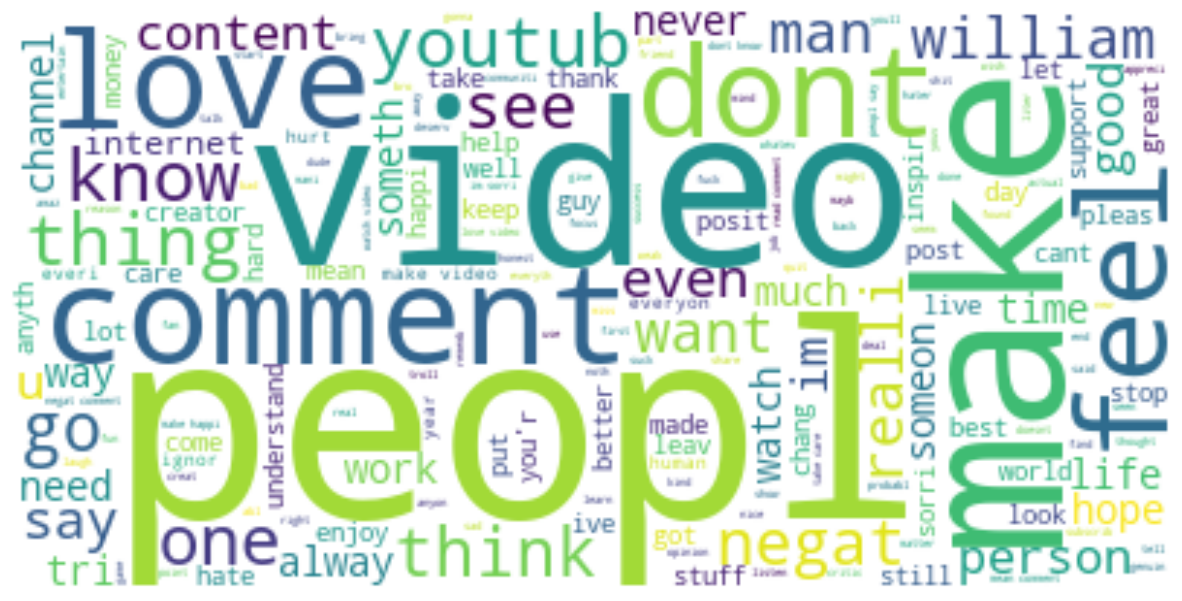

In [20]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# data.loc[:, 'Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["content"]]

In [22]:
df.loc[:, 'Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["content"]]

In [23]:
data = data.merge(df[['Compound']], left_index=True, right_index=True, how='left')

In [24]:
data.head()

,content,Positive,Negative,Neutral,Compound
0,love u man,0.808,0.000,0.192,0.6369
1,peopl gonna hate whatev king love video keep h...,0.441,0.151,0.408,0.7964
2,love dude,0.808,0.000,0.192,0.6369
3,dont let idiot get man negat everywher tri ign...,0.274,0.210,0.516,0.6126
4,vid da best,0.677,0.000,0.323,0.6369


In [25]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,content,Positive,Negative,Neutral,Compound,Sentiment
0,love u man,0.808,0.000,0.192,0.6369,Positive
1,peopl gonna hate whatev king love video keep h...,0.441,0.151,0.408,0.7964,Positive
2,love dude,0.808,0.000,0.192,0.6369,Positive
3,dont let idiot get man negat everywher tri ign...,0.274,0.210,0.516,0.6126,Positive
4,vid da best,0.677,0.000,0.323,0.6369,Positive


In [26]:
print(data["Sentiment"].value_counts())

Positive    603
Negative    230
Neutral     167
Name: Sentiment, dtype: int64


In [27]:
data.to_csv("new_data.csv")

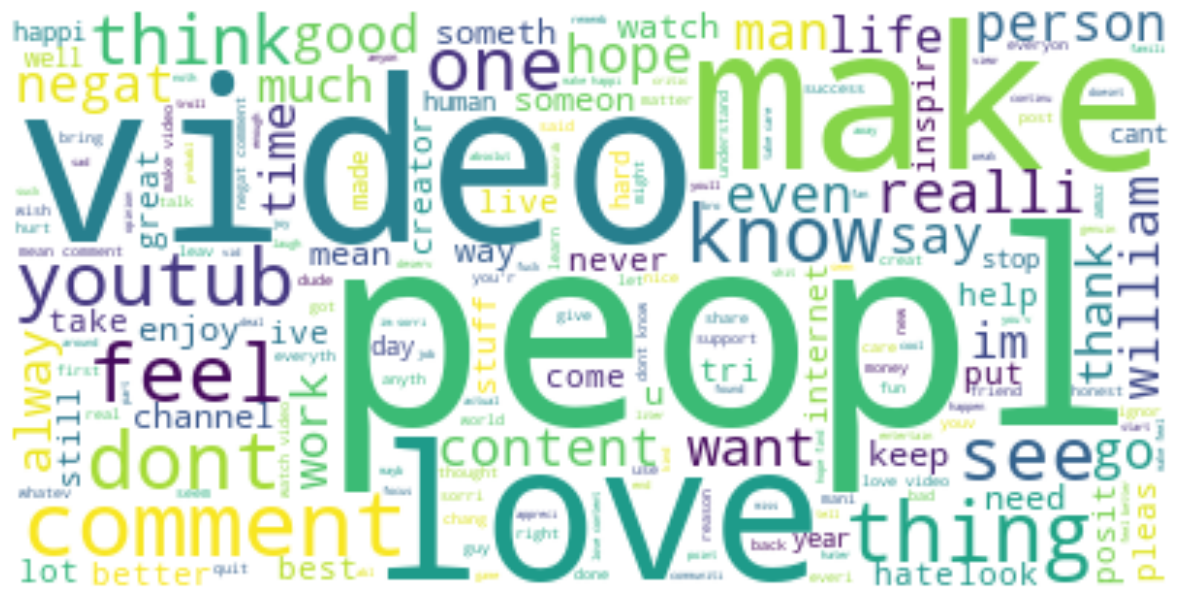

In [30]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

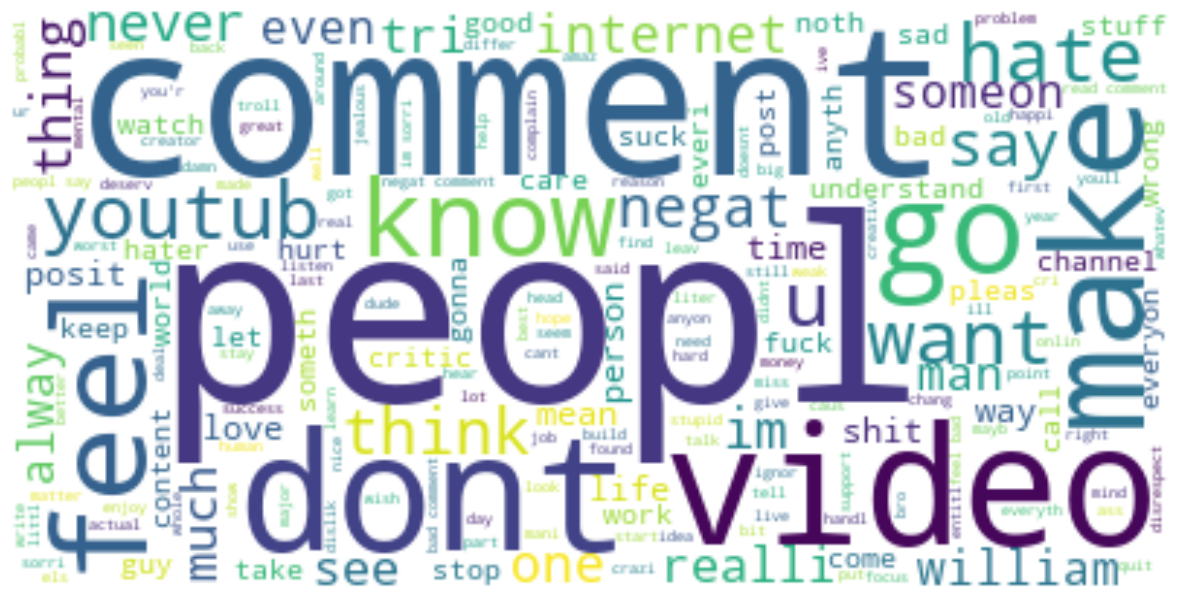

In [31]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()